<h1>Box Plots

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
name = ['John', 'Victor', 'Carlos', 'Leo', 'Kevin', 'Silva', 'Johnson', 'Lewis', 'George', 'Daniel', 'Harry', 'Jordan', 'James']
salary = [4000, 1000, 2000, 100000, 3500, 6000, 1500, 3000, 2500, 3600, 2100, 1700, 1600]

In [76]:
df = pd.DataFrame({'Name': name, 'Salary': salary})

In [67]:
df.head(5)

,Name,Salary
0,John,4000
1,Victor,1000
2,Carlos,2000
3,Leo,100000
4,Kevin,3500


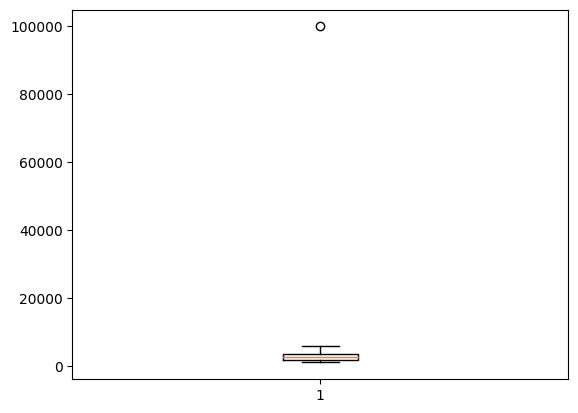

In [77]:
plt.boxplot(df['Salary'])
plt.show()

<h2>Interquartile Method

In [59]:
q1 = df['Salary'].quantile(0.25)
q3 = df['Salary'].quantile(0.75)
iqr = q3 - q1

In [60]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [87]:
outliers = df[(df['Salary'] < lower_bound) | (df['Salary'] > upper_bound)]
outliers

,Name,Salary
3,Leo,100000


<h2>Standard deviation method

In [78]:
mean = df.Salary.mean()
mean

10192.307692307691

In [79]:
std = df.Salary.std()
std

27017.107590637876

In [84]:
upper_bound = mean + 3 * std
upper_bound

91243.63046422132

In [85]:
lower_bound = mean - 3 * std
lower_bound

-70859.01507960595

In [86]:
outliers = df[(df['Salary'] < lower_bound) | (df['Salary'] > upper_bound)]
outliers

,Name,Salary
3,Leo,100000


<h2>Z score method

In [88]:
from scipy import stats

In [89]:
df['Salary_zscore'] = stats.zscore(df['Salary'])
df.head()

,Name,Salary,Salary_zscore
0,John,4000,-0.238558
1,Victor,1000,-0.354133
2,Carlos,2000,-0.315608
3,Leo,100000,3.459838
4,Kevin,3500,-0.257821


In [94]:
filtered_df = df[(df['Salary_zscore'] <= 3) & (df['Salary_zscore'] >= -3)]
filtered_df.head()

,Name,Salary,Salary_zscore
0,John,4000,-0.238558
1,Victor,1000,-0.354133
2,Carlos,2000,-0.315608
4,Kevin,3500,-0.257821
5,Silva,6000,-0.161508
